In [1]:
%%capture
!pip install streamlit
!pip install ta
!npm install localtunnel
from google.colab import drive
drive.mount('/content/drive')

##Adding model predictios to the data.

In [15]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import time
import tensorflow as tf
from ta.volatility import BollingerBands
from ta.trend import MACD,sma_indicator
from ta.momentum import RSIIndicator
import datetime


model = tf.keras.models.load_model('/content/drive/MyDrive/Intel SIP/Crypto_Guides/Time_Sereies_model.h5')
def predict(df):
  ke = dict()
  pre = [None for i in df['Close'][:-160]]
  pre.extend(df['Close'][-160:])
  ke['predicted'] = pre
  a = []
  a = list(df['Close'][:-160])
  a.extend(None for i in range(160))
  ke['Close'] = a
  ke = pd.DataFrame(ke,index=[i for i in df.index])
  return ke


option = st.sidebar.selectbox('Select one symbol', ( 'Bitcoin','Etherium','Litecoin'))
if option=='Bitcoin':
  st.sidebar.success('Accuracy for Bitcoin prediction is 72.34%')
if option == 'Etherium':
  st.sidebar.success('Accuracy for Etherium prediction is 82.58%')
if option == 'Litecoin':
  st.sidebar.success('Accuracy for Litecoin prediction is 88.57%')

today = datetime.date.today()
before = today - datetime.timedelta(days=60)

if option == 'Bitcoin':
  opt = 'BTC-USD'
if option == 'Etherium':
  opt = 'ETH-USD'
if option == 'Litecoin':
  opt = 'LTC-USD'

df = yf.download(opt,start= before,end= today, interval = '1h',progress=False)


#predictions = df[['Close'][:-60],['AdjClose'][-60:]]

sma = df
sma['sma200'] = sma_indicator(df['Close'],200,fillna=True)
sma['sma100'] = sma_indicator(df['Close'],100,fillna=True)
sma['sma50'] = sma_indicator(df['Close'],50,fillna=True)
sma = sma[['Close','sma200','sma100','sma50']]

bb = df
indicator_bb = BollingerBands(df['Close'])
bb['bb_h'] = indicator_bb.bollinger_hband()
bb['bb_l'] = indicator_bb.bollinger_lband()
bb = bb[['Close','bb_h','bb_l']]

macd = MACD(df['Close']).macd()

rsi = RSIIndicator(df['Close']).rsi()


###################
# Set up main app #
###################
ke = predict(df)

if np.average(ke['Close'][-160:]) > np.average(ke['Close'][240:-160]):
  st.success(f"The model predicts that the price of {option} may increase in the following times.")
else:
  st.error(f"The model predicts that the price of {option} may decrease in the following times.")

st.write('Predictions from the time series model')
st.line_chart(ke[['Close','predicted']],color=["#0000FF", "#FF0000"])

st.write('Moving average')

st.line_chart(sma)

st.write('Stock Bollinger Bands')

st.line_chart(bb)

progress_bar = st.progress(0)


st.write('Stock Moving Average Convergence Divergence (MACD)')
st.area_chart(macd)

st.write('Stock RSI ')
st.line_chart(rsi)

recent =  df.sample(n=10)
st.write('Recent trade data ')
st.dataframe(recent)


Overwriting app.py


In [16]:
!streamlit run /content/app.py &>/content/logs.txt &
!curl ipv4.icanhazip.com
!npx localtunnel --port 8501

35.221.212.90
npx: installed 22 in 2.455s
your url is: https://violet-cycles-draw.loca.lt
^C


## Instructions to run the web-app locally
1. Execute all the cells.
2. Click on the url displayed in the above cell.
3. The link will open a warning page mentioning that this is a tunnel website.
4. To continue copy the URL of the machine displayed in the first line of the output of the above cell.

## The app is hosted at [link](https://stockmarketpredictions-aarsh-patel.streamlit.app/).

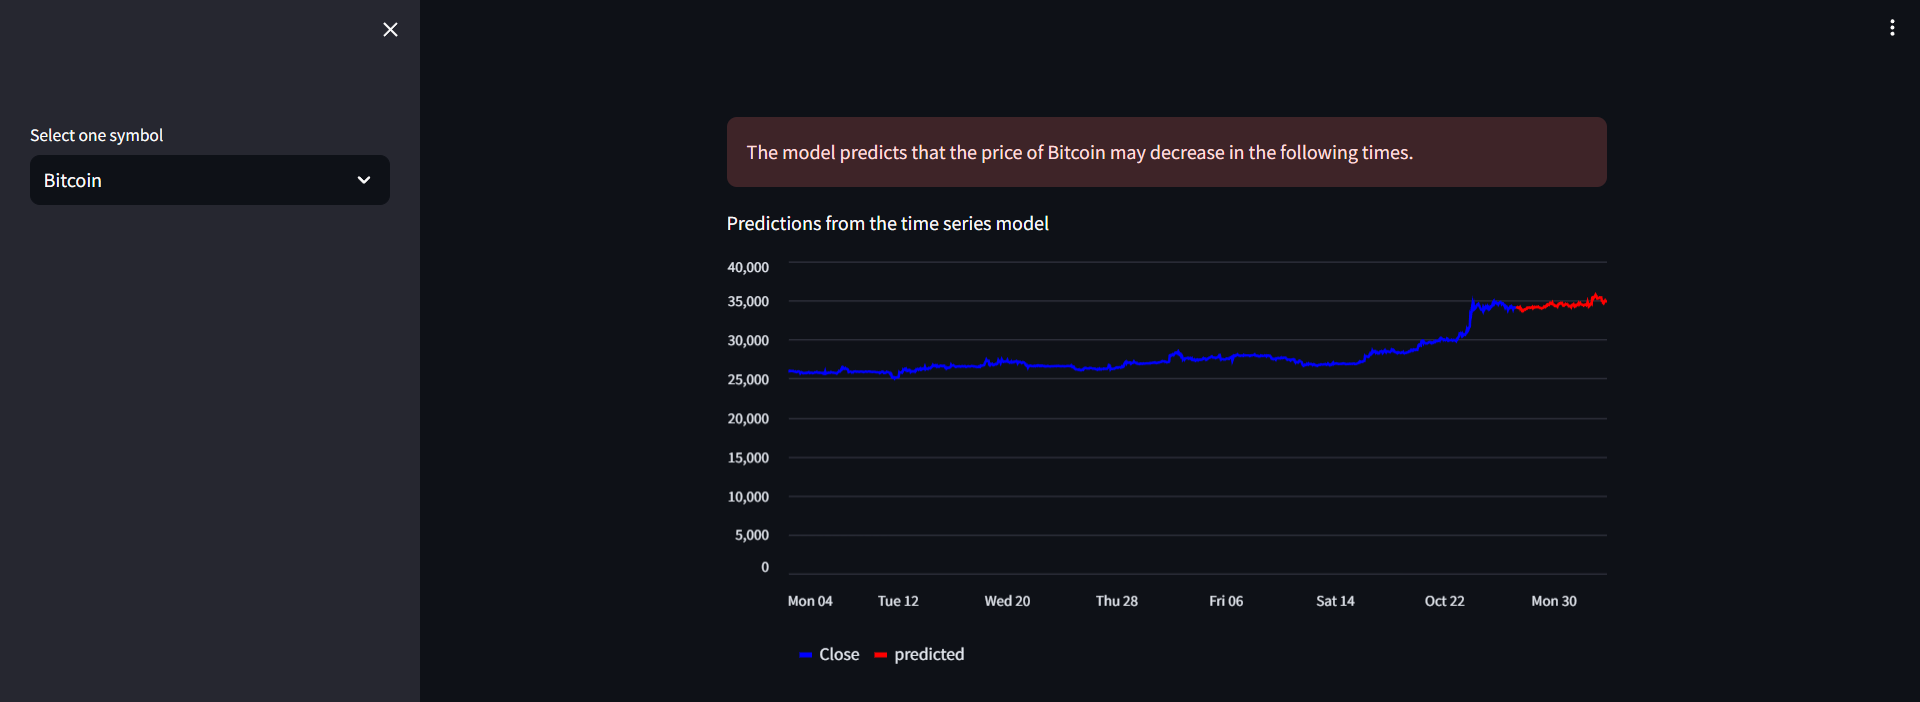

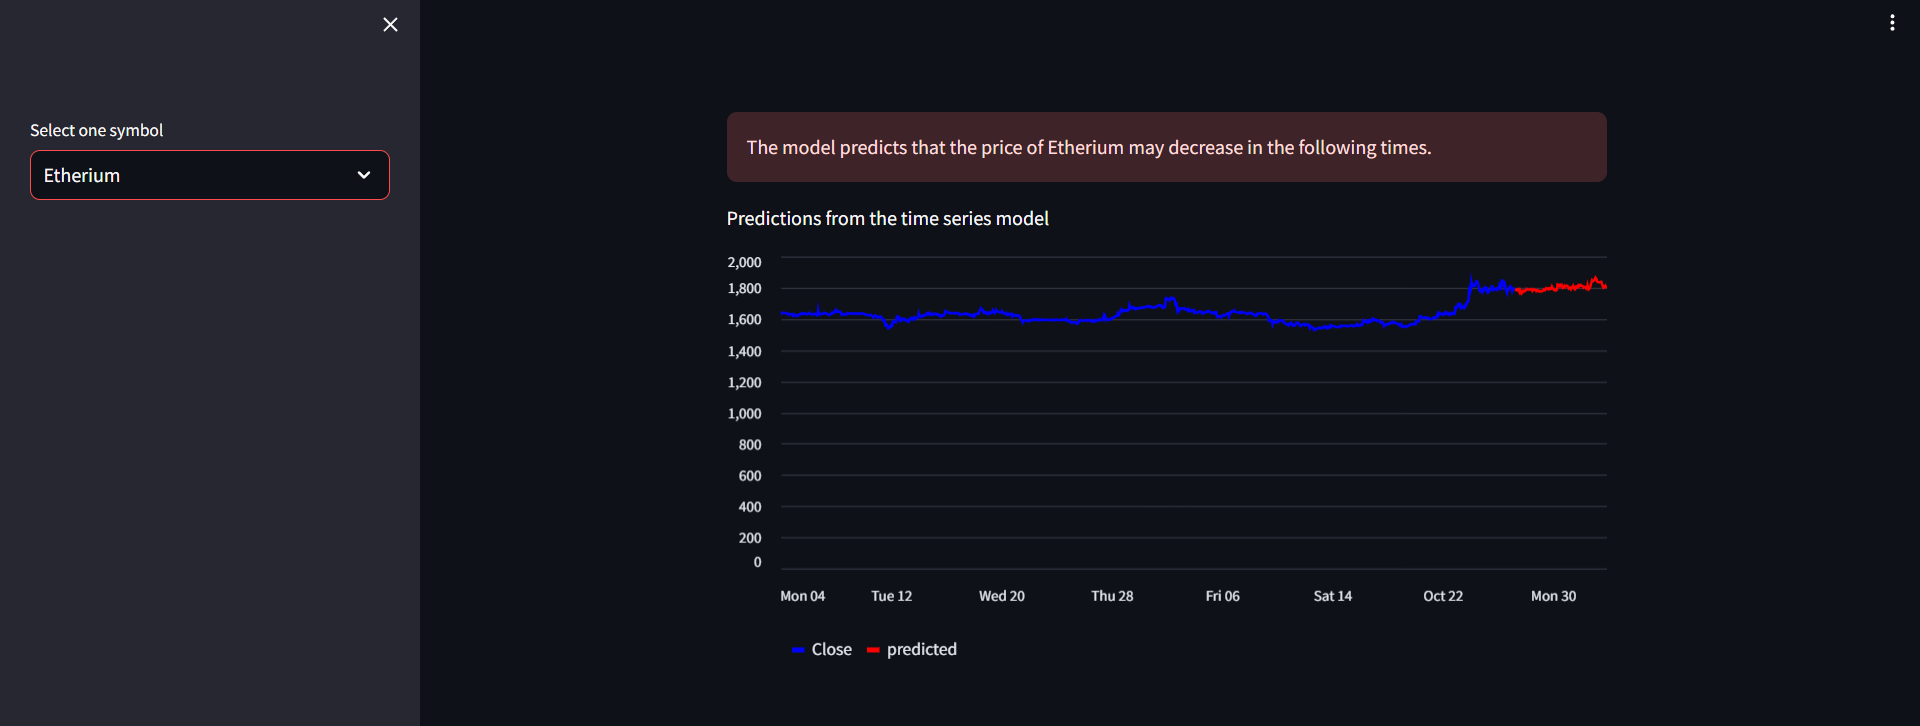

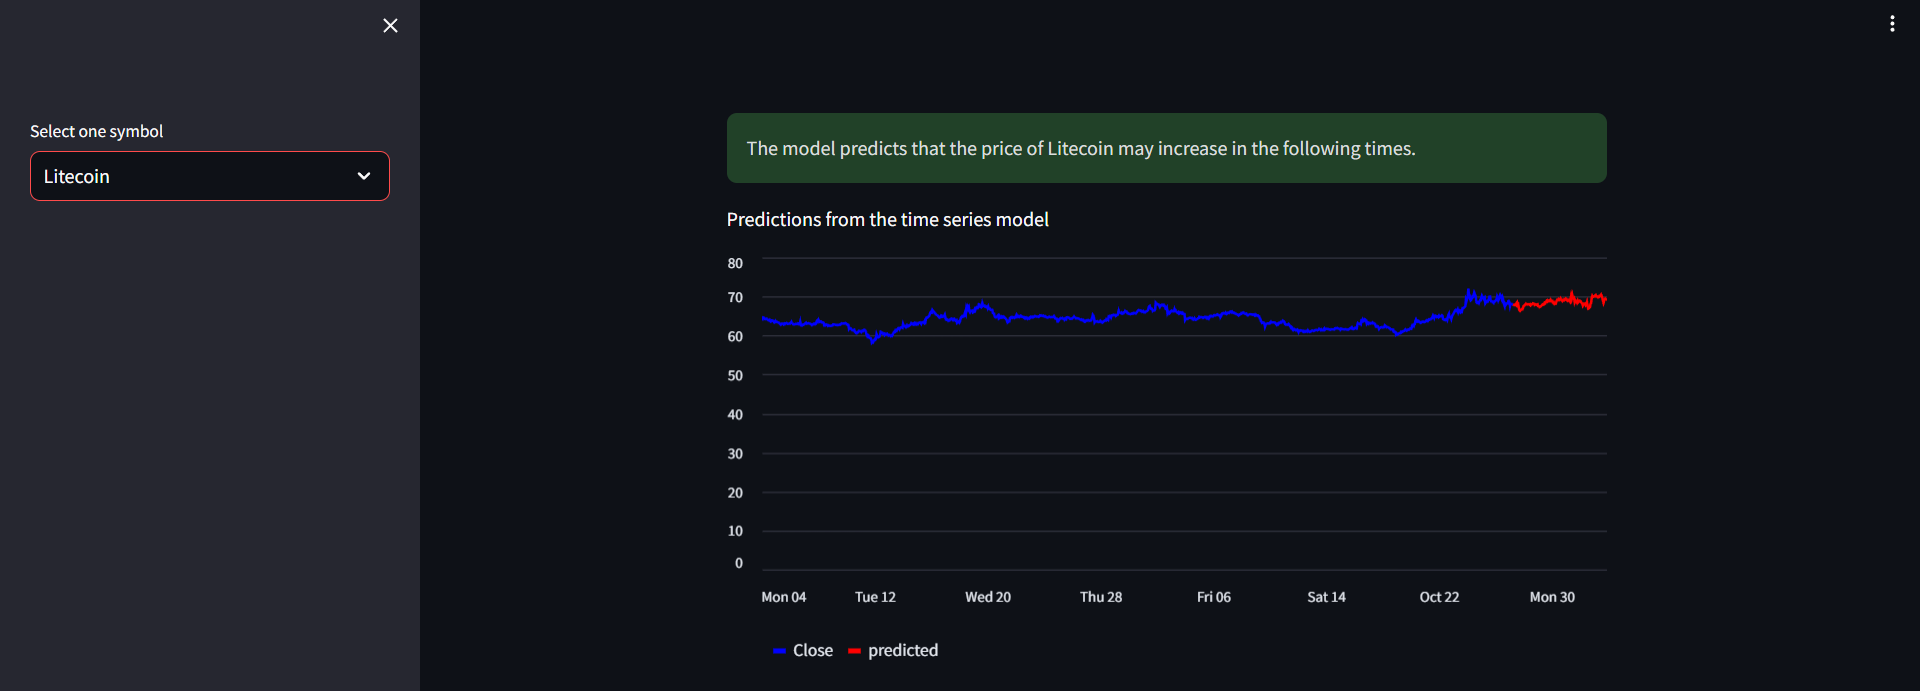

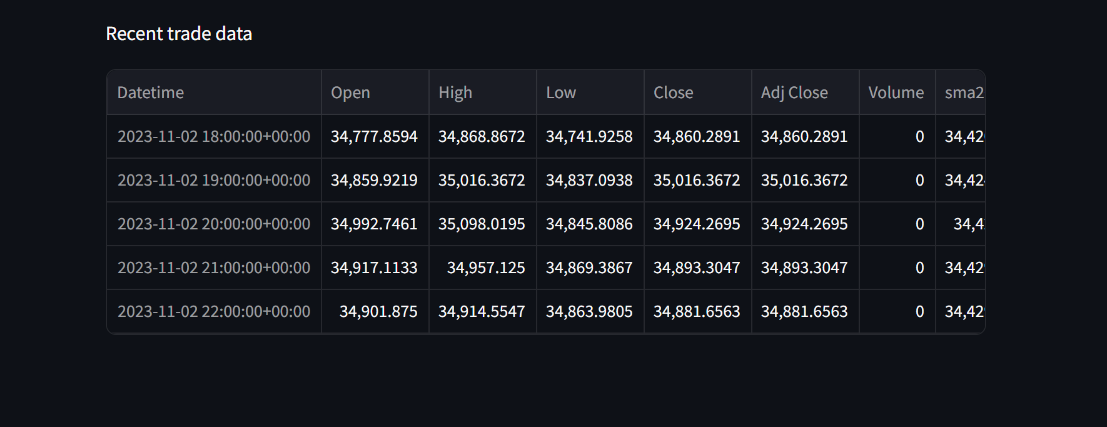

#Model Deployment websites

## Recommended websites of hosting streamlit apps
1. [Hugging Face Spaces](https://huggingface.co/spaces/bohmian/simple_streamlit_app)

*  **Streamlit Integration:** Hugging Face Spaces provides seamless integration with Streamlit, allowing you to effortlessly host and share Streamlit apps directly from your Hugging Face Space. This integration simplifies the deployment process and enables you to create interactive and data-driven applications with Streamlit.

*  **Collaborative and Version-Controlled:** Hugging Face Spaces offers collaborative and version-controlled environments for Streamlit apps. Multiple team members can work together on app development, and the platform tracks changes and versions, making it easy to manage and iterate on your Streamlit applications within a shared workspace.

2.  [Streamlit Cloud](https://share.streamlit.io/damianboh/simple_streamlit_app/main/app.py)

* **Auto-scaling and performance optimization:** Streamlit Cloud automatically handles the scaling of resources based on the app's demand, ensuring optimal performance for your application. It can seamlessly accommodate increases in traffic, so your app remains responsive even during high usage periods.

* **Integrated analytics and monitoring:** Streamlit Cloud offers built-in analytics and monitoring tools that allow you to gain insights into your app's usage and performance. User engagement, analyze traffic patterns, and access detailed logs, enabling us to make data-driven improvements to the Streamlit app.


3.  [Heroku App Platform](https://simple-streamlit-app-bohmian.herokuapp.com/)

*   Heroku App Platform offers users access to an extensive ecosystem of add-ons and extensions, enabling them to enhance their applications with a wide range of services, including databases, caching, monitoring, and analytics. This diverse set of add-ons simplifies the process of extending and customizing applications with minimal effort.

*  Heroku App Platform provides built-in support for Continuous Integration and Deployment (CI/CD) pipelines. Users can seamlessly integrate their application's source code with well-known version control systems such as GitHub, GitLab, and Bitbucket. This allows for the establishment of automated workflows that streamline testing and deployment, ensuring a smooth and efficient development lifecycle for applications.